# Multi-target Regression

In [1]:
from sklearn.datasets import make_regression

x, y = make_regression(
    n_samples=500, n_features=8, n_informative=8, n_targets=3, noise=30.0
)

In [2]:
x.shape, y.shape

((500, 8), (500, 3))

In [3]:
feature_names = [f'Feature # {i}' for i in range(x.shape[1])]

dfx = pd.DataFrame(
    x, columns=feature_names
)

dfx.head(5)

,Feature # 0,Feature # 1,Feature # 2,Feature # 3,Feature # 4,Feature # 5,Feature # 6,Feature # 7
0,0.985063,-0.234092,-0.548207,0.172758,-0.164783,1.576365,1.054323,0.384962
1,0.935437,0.256300,1.015394,0.679767,1.130335,-0.921582,-2.327100,-1.134328
2,1.587509,-0.613461,-0.831734,0.230124,0.478013,1.154532,-0.288030,0.554882
3,-1.203131,0.384008,1.217668,-1.530389,-1.811354,0.232074,0.690616,-1.305875
4,0.982752,-0.063857,-0.210975,0.537989,-0.489671,-1.055574,1.114263,1.950719


In [4]:
target_names = [f'Target # {i}' for i in range(y.shape[1])]

dfy = pd.DataFrame(
    y, columns=target_names
)

dfy.head(5)

,Target # 0,Target # 1,Target # 2
0,310.838108,74.799393,128.215418
1,-221.952989,-13.383877,-27.150561
2,266.348992,46.170181,107.569697
3,-258.546123,-9.963706,-39.545191
4,205.705567,65.084581,-28.292117


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((375, 8), (375, 3), (125, 8), (125, 3))

In [7]:
# This code will throw a `ValueError: bad input shape`
# We will fix that in the next section

from sklearn.linear_model import SGDRegressor

rgr = SGDRegressor()
rgr.fit(x_train, y_train)

y_pred = rgr.predict(x_test)

ValueError: bad input shape (375, 3)

## MultiOutput Regressor

In [549]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import SGDRegressor

rgr = MultiOutputRegressor(
    estimator=SGDRegressor(), 
    n_jobs=-1
)
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)

In [550]:
df_pred = pd.DataFrame(
    y_pred, columns=target_names
)

df_pred.head(4)

,Target # 0,Target # 1,Target # 2
0,388.246760,265.861254,304.680191
1,-14.613780,229.371666,-54.839709
2,-99.291296,-137.406606,-78.830682
3,70.124828,102.777829,66.346197


In [551]:
df_pred.describe()

,Target # 0,Target # 1,Target # 2
count,125.000000,125.000000,125.000000
mean,-6.321237,-2.894993,11.095910
std,138.403445,145.645776,175.687486
min,-453.102572,-438.465922,-448.537570
25%,-104.854652,-90.421777,-88.148752
50%,7.229997,-6.481535,20.461999
75%,90.195058,106.442328,122.109468
max,388.246760,322.595498,380.896983


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


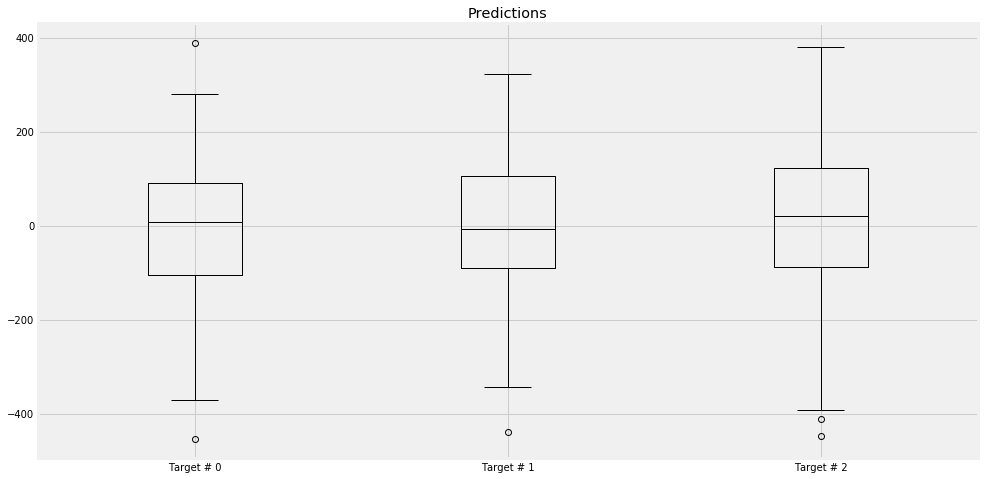

In [552]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

df_pred.plot(
    title='Predictions',
    kind='box',
    color='k',
    ax=ax
)

fig.show()

In [553]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

for t in range(y_train.shape[1]):
    print(
        'Target # {}: MAE={:.2f}, R2={:.2f}'.format(
            t,
            mean_absolute_error(y_test[t], y_pred[t]),
            r2_score(y_test[t], y_pred[t]),
        )
    )

Target # 0: MAE=14.70, R2=0.69
Target # 1: MAE=31.19, R2=0.91
Target # 2: MAE=14.35, R2=-0.05


## Regressor Chain

In [554]:
from sklearn.multioutput import RegressorChain
from sklearn.linear_model import Ridge

rgr = RegressorChain(
    base_estimator=Ridge(
        alpha=1
    ), 
    order=[0,1,2],
)
rgr.fit(x_train, y_train)
y_pred = rgr.predict(x_test)

In [555]:
df_pred = pd.DataFrame(
    y_pred, columns=[f'Target # {i}' for i in range(y.shape[1])]
)

df_pred.head(5)

,Target # 0,Target # 1,Target # 2
0,387.104197,265.167365,303.593918
1,-14.625026,228.614278,-54.647947
2,-99.105470,-137.019174,-78.690924
3,69.916189,102.628805,66.052427
4,-9.471532,-50.476765,-35.556791


In [556]:
df_pred.describe()

,Target # 0,Target # 1,Target # 2
count,125.000000,125.000000,125.000000
mean,-6.399924,-2.874063,10.938459
std,138.015465,145.252443,175.230760
min,-452.289156,-437.354509,-447.399992
25%,-105.235770,-89.957469,-88.167254
50%,7.067715,-6.434888,20.448758
75%,90.005280,105.966721,121.561737
max,387.104197,321.824953,379.912155


In [557]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

for t in range(y_train.shape[1]):
    print(
        'Target # {}: MAE={:.2f}, R2={:2f}'.format(
            t,
            mean_absolute_error(y_test[t], y_pred[t]),
            r2_score(y_test[t], y_pred[t]),
        )
    )

Target # 0: MAE=14.80, R2=0.685697
Target # 1: MAE=31.01, R2=0.908830
Target # 2: MAE=14.23, R2=-0.027262


In [558]:
for t, estimator in enumerate(rgr.estimators_):
    print(f'\nEstimator for Target # {t}:')
    df_coef = pd.DataFrame(
        zip(
            rgr.estimators_[t].coef_, 
            feature_names + target_names
        ),
        columns=['Coeff', 'Feature']
    )
    print(df_coef)


Estimator for Target # 0:
       Coeff      Feature
0  79.918255  Feature # 0
1  54.445405  Feature # 1
2   8.751636  Feature # 2
3  70.475604  Feature # 3
4  55.110842  Feature # 4
5  32.234095  Feature # 5
6  10.481355  Feature # 6
7  12.246104  Feature # 7

Estimator for Target # 1:
       Coeff      Feature
0  39.483124  Feature # 0
1  14.649653  Feature # 1
2  15.149074  Feature # 2
3  36.561750  Feature # 3
4  92.613430  Feature # 4
5  29.281277  Feature # 5
6  56.292321  Feature # 6
7  77.943212  Feature # 7
8   0.037757   Target # 0

Estimator for Target # 2:
       Coeff      Feature
0  70.360386  Feature # 0
1   1.835239  Feature # 1
2  92.844093  Feature # 2
3  89.221276  Feature # 3
4  41.716647  Feature # 4
5  70.822408  Feature # 5
6  27.621890  Feature # 6
7  14.965828  Feature # 7
8   0.090121   Target # 0
9  -0.026836   Target # 1


In [559]:
pd.DataFrame(
    zip(
        rgr.estimators_[0].coef_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,79.9183
1,Feature # 1,54.4454
2,Feature # 2,8.75164
3,Feature # 3,70.4756
4,Feature # 4,55.1108
5,Feature # 5,32.2341
6,Feature # 6,10.4814
7,Feature # 7,12.2461


In [560]:
pd.DataFrame(
    zip(
        rgr.estimators_[-1].coef_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,70.3604
1,Feature # 1,1.83524
2,Feature # 2,92.8441
3,Feature # 3,89.2213
4,Feature # 4,41.7166
5,Feature # 5,70.8224
6,Feature # 6,27.6219
7,Feature # 7,14.9658
8,Target # 0,0.0901208
9,Target # 1,-0.0268364


# Multi-target Regression


**Multiclass classification:** classification task with more than two classes. Each sample can only be labelled as one class. For example, classification using features extracted from a set of images of fruit, where each image may either be of an orange, an apple, or a pear. Each image is one sample and is labelled as one of the 3 possible classes. 

**Multilabel classification:** classification task labelling each sample with x labels from n_classes. For example, prediction of the topics relevant to a text document or video. The document or video may be about one of ‘religion’, ‘politics’, ‘finance’ or ‘education’, several of the topic classes or all of the topic classes.

In [592]:
from sklearn.datasets import make_multilabel_classification

x, y = make_multilabel_classification(
    n_samples=500, n_features=8, n_classes=3, n_labels=2
)

In [593]:
x.shape, y.shape

((500, 8), (500, 3))

In [596]:
np.unique(y)

array([0, 1])

In [597]:
y[:,-1] = y[:,0]

In [598]:
feature_names = [f'Feature # {i}' for i in range(x.shape[1])]
target_names = [f'Target # {i}' for i in range(y.shape[1])]

In [599]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [600]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

ValueError: bad input shape (375, 3)

In [602]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = MultiOutputClassifier(
    estimator=GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.01,
        subsample=0.8,
    ),
    n_jobs=-1
)
clf.fit(x_train, y_train)
y_pred_multioutput = clf.predict(x_test)

In [603]:
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import GradientBoostingClassifier

clf = ClassifierChain(
    base_estimator=GradientBoostingClassifier(
        n_estimators=500,
        learning_rate=0.01,
        subsample=0.8,
    ),
    order=[0,1,2]
)
clf.fit(x_train, y_train)
y_pred_chain = clf.predict(x_test)

In [604]:
pd.DataFrame(
    zip(
        clf.estimators_[-2].feature_importances_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,0.0637737
1,Feature # 1,0.043504
2,Feature # 2,0.111602
3,Feature # 3,0.145739
4,Feature # 4,0.044972
5,Feature # 5,0.120289
6,Feature # 6,0.0643232
7,Feature # 7,0.286162
8,Target # 0,0.119635


In [605]:
pd.DataFrame(
    zip(
        clf.estimators_[-1].feature_importances_, 
        feature_names + target_names
    ),
    columns=['Coeff', 'Feature']
)[
    ['Feature', 'Coeff']
].style.bar(
    subset=['Coeff'], align='mid', color='#AAAAAA'
)

,Feature,Coeff
0,Feature # 0,0
1,Feature # 1,0
2,Feature # 2,0
3,Feature # 3,0
4,Feature # 4,0
5,Feature # 5,0
6,Feature # 6,0
7,Feature # 7,0
8,Target # 0,1
9,Target # 1,0


In [606]:
from sklearn.metrics import f1_score

print(
    'F1-Score; MultiOutputClassifier={:.2f}, ClassifierChain={:.2f}'.format(
        f1_score(y_test, y_pred_multioutput, average='macro'),
        f1_score(y_test, y_pred_chain, average='macro'),
    )
)

F1-Score; MultiOutputClassifier=0.85, ClassifierChain=0.86


## One-Vs-The-Rest

In [569]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=5000, n_features=15, n_informative=8, n_redundant=2, n_classes=4, class_sep=0.5, # 0.005,
)

In [570]:
x.shape, y.shape

((5000, 15), (5000,))

In [571]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [572]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(
    estimator=LogisticRegression(solver='saga')
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.4432

In [573]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

clf = OneVsOneClassifier(
    estimator=LogisticRegression(solver='saga')
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.464

In [578]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier

clf = OutputCodeClassifier(
    estimator=LogisticRegression(solver='saga'),
    code_size=0.8
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.3448

In [579]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier

clf = OutputCodeClassifier(
    estimator=LogisticRegression(solver='saga'),
    code_size=0.6
)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.2816

# Calibration

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


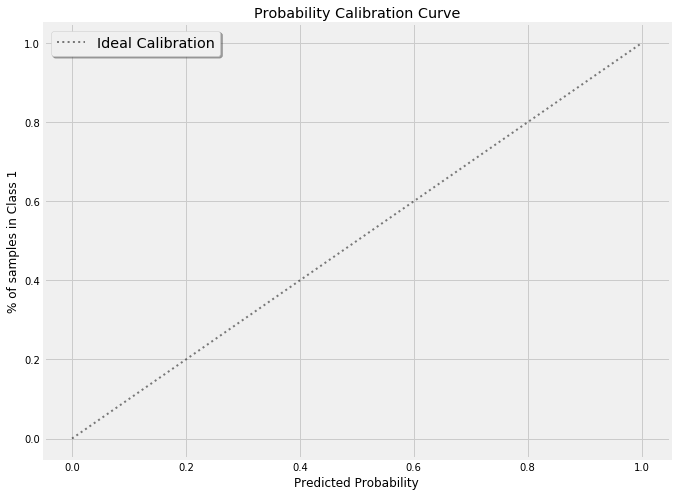

In [699]:
from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()

In [700]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=50000, n_features=15, n_informative=5, n_redundant=10, n_classes=2, class_sep=0.001
)

x.shape, y.shape

((50000, 15), (50000,))

In [701]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [702]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)[:,-1]

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


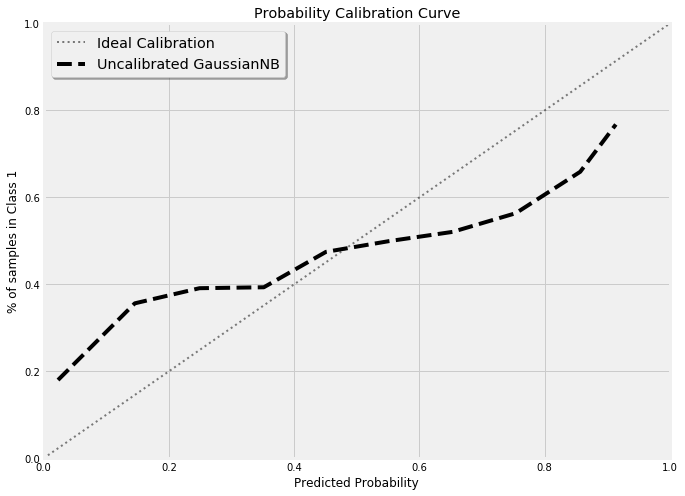

In [703]:
from sklearn.calibration import calibration_curve

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

ax.plot(
    mean_predicted_value, fraction_of_positives, "--", label='Uncalibrated GaussianNB', color='k'
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')
ax.set_xlim((0,1))
ax.set_ylim((0,1))

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()

In [704]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB

clf_calib = CalibratedClassifierCV(GaussianNB(), cv=3, method='isotonic')
clf_calib.fit(x_train, y_train)
y_pred_calib = clf_calib.predict(x_test)
y_pred_proba_calib = clf_calib.predict_proba(x_test)[:,-1]

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


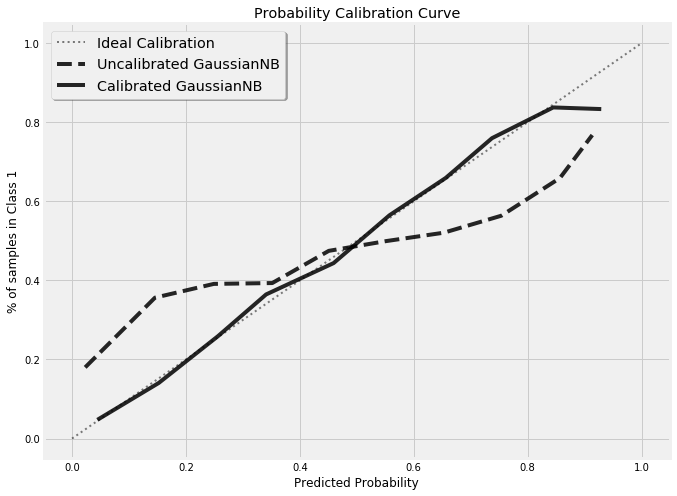

In [705]:
from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.plot(
    [0, 1], [0, 1], 
    linestyle=':', 
    lw=2, color='k',
    label='Ideal Calibration', alpha=0.5
)

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)

ax.plot(
    mean_predicted_value, fraction_of_positives, "--", label='Uncalibrated GaussianNB', color='k', alpha=0.85
)

fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba_calib, n_bins=10)

ax.plot(
    mean_predicted_value, fraction_of_positives, "-", label='Calibrated GaussianNB', color='k', alpha=0.85
)

ax.set_title('Probability Calibration Curve')
ax.set_xlabel('Predicted Probability')
ax.set_ylabel('% of samples in Class 1')

ax.legend(loc="upper left", fontsize='x-large', shadow=True)

fig.show()

## Precision @ k

In [711]:
def precision_at_k_score(y_true, y_pred_proba, k=1000, pos_label=1):
    topk = [
        y_true_ == pos_label 
        for y_true_, y_pred_proba_ 
        in sorted(
            zip(y_true, y_pred_proba), 
            key=lambda y: y[1], 
            reverse=True
        )[:k]
    ]
    return sum(topk) / len(topk)

In [713]:
precision_at_k_score(y_test, y_pred_proba, k=500)

0.82

In [715]:
for k in 1000, 1500, 3000, 6000:
    print(
        'precision @ k={:,}: {:.2%}'.format(
            k, precision_at_k_score(y_test, y_pred_proba, k=k)
        )
    )

precision @ k=1,000: 78.10%
precision @ k=1,500: 76.20%
precision @ k=3,000: 71.70%
precision @ k=6,000: 65.60%


In [717]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.621587462082912